In [1]:
import pandas as pd
import os
import missingno as msno
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]

# Define file names
file = 'merged_data.csv'

# Find full paths to the CSV files
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)

In [3]:
# Resulting DataFrame will have aggregated data from all four datasets based on the specific_column
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv(path)
data

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-2y,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.35,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/2224,38.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,0,1,0,0,NaN,NaN,27.80,26.55,NaN,NaN,NaN,NaN,55.0,56.0,NaN,38.0,42.0,8.90,8.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,30.0,30.0,1.25,1.25,NaN,0.380952,0.388889,3.00,3.0,NaN,0.148148,NaN,0.148148,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.8,0.7,0.5,0.5
2,MSOAC/0576,50.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,NaN,17.75,18.65,17.90,51.0,56.5,56.5,59.0,59.0,59.5,NaN,NaN,4.55,4.70,5.15,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.0,4.25,0.240741,0.277778,0.259259,0.166667,0.125000,0.166667,0.628571,0.671429,0.594937,0.531646,NaN,NaN,NaN,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,NaN,19.75,19.45,20.60,38.5,52.0,54.0,55.5,59.0,58.0,NaN,NaN,4.00,4.90,5.60,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,3.5,3.50,0.185185,0.277778,0.222222,0.083333,0.125000,0.125000,0.614286,0.614286,0.582278,0.645570,NaN,NaN,NaN,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,NaN,21.45,21.35,22.75,22.0,23.5,22.0,35.0,41.5,44.0,NaN,NaN,11.40,16.80,30.20,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,6.50,0.222222,0.333333,0.185185,0.083333,0.166667,0.083333,0.600000,0.742857,0.506329,0.531646,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,0,0,0,NaN,NaN,29.40,25.65,NaN,14.0,12.0,NaN,17.5,16.0,NaN,NaN,NaN,9.30,8.10,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857,0.614286,0.645570,0.588608,NaN,NaN,NaN,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,0,0,0,0,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,MSOAC/5705,30.0,M,NaN,NaN,MILD,NaN,2.0,NaN,RRMS,0,0,0,0,515.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,MSOAC/8255,42.0,M,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,0,0,0,0,259.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.9,0.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set to 0 because ... (write the explanation)

In [5]:
data['NRELAP'] = data['NRELAP'].fillna(0)

In [6]:
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Column Name': missing_percentage_data.index, 'Missing Percentage': missing_percentage_data.values})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
missing_data.head(60)

,Column Name,Missing Percentage
8,MHCONTRT,88.235294
35,DS_R,87.423935
34,DS_L,87.423935
33,DS,87.423935
21,PASAT_2s-after_2y,85.922921
6,CECONTRT,82.799189
59,SF12_P-after,79.918864
57,SF12_M-after,79.918864
26,SDMT-2y,79.878296
58,SF12_P-before,79.797160


Question from them during meeting: how many rows we have for which the targets are all there (supervised, other rows would be 'semi-supervised') -- note I don't yet use all the targets here because I feel it will be 0 (it's already 154 now using only the most occuring functional tests)

In [7]:
# Specify the list of variables
#variables = ['NRELAP', 'CESEV', 'SMSTDY', 'EDSS-2y', 'EDSS-after_2y', 'NHPT-2y', 'NHPT-after_2y', 'T25FW-2y', 'T25FW-after_2y']
variables = ['EDSS-2y', 'T25FW-2y']

# Check for rows where there are no missing values in any of the specified variables
rows_with_no_missing_values = data.dropna(subset=variables, how='any')

# Display the number of rows with no missing values
print("Number of complete cases (fully annotated dataset):", len(rows_with_no_missing_values))

Number of complete cases (fully annotated dataset): 1598


try to use the package Robbe set (these plots are not informative so we can remove later - only do for outputs)

In [8]:
#msno.matrix(data)

In [9]:
#msno.bar(data)

In [10]:
#msno.heatmap(data)

<Axes: >

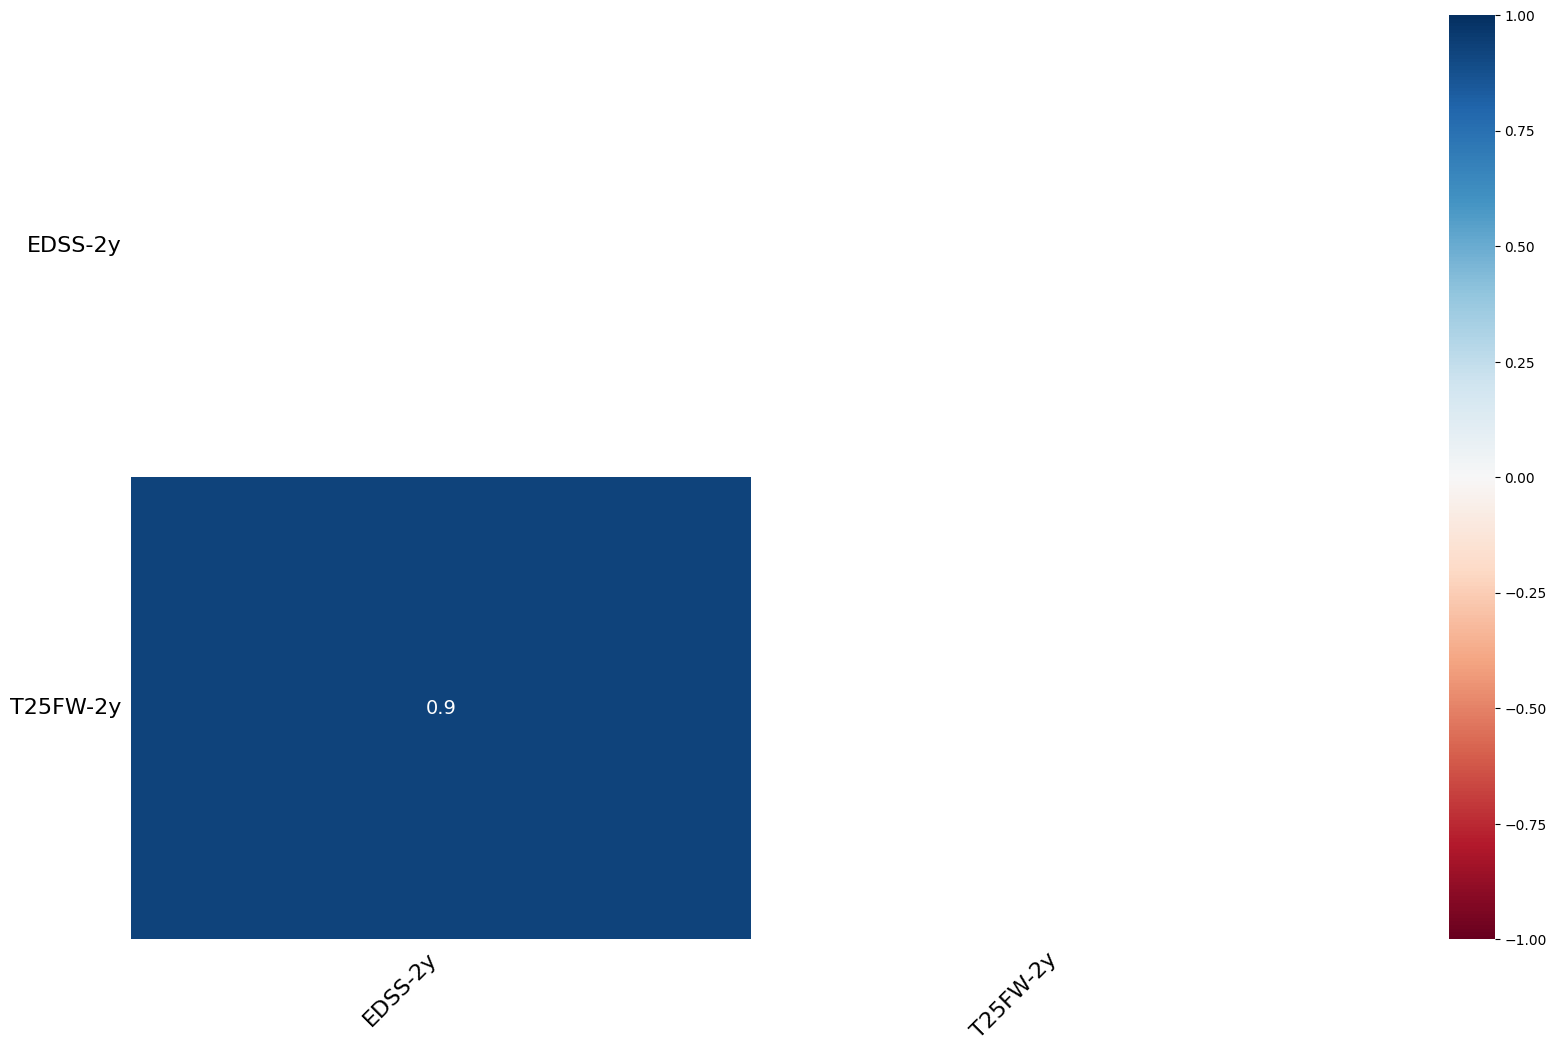

In [11]:
targets = data[variables]
msno.heatmap(targets)

## Chain with 2 models

Train-test split

In [12]:
# Assuming 'data' is a pandas DataFrame
variables = ['EDSS-2y', 'T25FW-2y']

# Select complete cases
complete_cases = data.dropna(subset=variables, how='any')
len(complete_cases)

1598

In [13]:
# Select non-complete cases
non_complete_cases = data[~data.index.isin(complete_cases.index)]
len(non_complete_cases)

867

First split in fully annotated and weakly annotated dataset (for training: use both complete and non-complete, for evaluating only use complete cases)

In [14]:
# Extract targets
targets = complete_cases[variables]

# Extract features by dropping the target columns
features = complete_cases.drop(variables, axis=1)

In [15]:
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1278 1278 320 320


In [16]:
y_train

,EDSS-2y,T25FW-2y
133,1.00,2.90
2089,2.00,5.90
1948,2.00,4.95
1276,6.00,10.30
1396,6.25,10.20
...,...,...
1373,2.00,3.80
1395,4.00,9.45
2114,6.00,11.80
2234,6.25,12.60


In [17]:
weakly_annotated_EDSS_2y = non_complete_cases.dropna(subset=['EDSS-2y'], how='any')
len(weakly_annotated_EDSS_2y)

16

only 16 extra rows but at least it's something

In [18]:
# Extract targets
targets_1 = weakly_annotated_EDSS_2y[variables]

# Extract features by dropping the target columns
features_1 = weakly_annotated_EDSS_2y.drop(variables, axis=1)

Concatenate the weakly annotated data to the training data

In [19]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_1], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,1.00,2.90
1,2.00,5.90
2,2.00,4.95
3,6.00,10.30
4,6.25,10.20
...,...,...
1289,7.50,NaN
1290,7.50,NaN
1291,7.00,NaN
1292,8.00,NaN


In [20]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_1], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN
1290,MSOAC/8814,33.0,M,NON-WHITE,ASIA,SEVERE,Y,6.0,NaN,RRMS,0,1,1,1,45.0,3.0,37.05,207.90,NaN,NaN,NaN,NaN,36.0,33.0,NaN,35.5,21.0,47.35,NaN,0.0,0.0,0.0,NaN,NaN,NaN,9.0,13.0,0.800,0.800,NaN,0.111111,0.206349,4.00,NaN,0.370370,NaN,0.407407,0.166667,NaN,0.083333,NaN,NaN,NaN,NaN,0.700000,0.600000,0.653846,0.596154
1291,MSOAC/4555,37.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,0,NaN,0.0,50.25,49.90,NaN,38.5,33.0,NaN,48.0,46.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.628571,0.544304,0.525316,NaN,NaN,NaN,NaN
1292,MSOAC/4665,38.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,1,NaN,0.0,70.55,300.00,NaN,NaN,NaN,NaN,59.0,38.0,24.0,NaN,NaN,26.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,8.50,NaN,NaN,NaN,NaN,NaN,NaN,0.685714,0.664286,0.518987,0.500000,NaN,NaN,NaN,NaN


In [22]:
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']
# still need to change in OE dataframe the SLEC and SES so name is consistent with the others

X_train_1 = X_train[columns_to_keep]
X_train_1

,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,25.0,M,WHITE,OCEANIA,NaN,RRMS,0,0,1,0,20.15,NaN,55.5,NaN,2.85,34.5,1.250,NaN,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN
1,45.0,F,WHITE,EUROPE,NaN,RRMS,1,0,1,1,17.60,NaN,49.0,49.5,5.85,24.5,1.250,0.047619,3.00,0.259259,0.000000,NaN,NaN,0.733333,0.769231
2,21.0,F,WHITE,EURASIA,NaN,RRMS,1,0,0,0,22.00,NaN,49.5,82.5,4.70,5.0,0.625,0.015873,2.00,0.074074,0.000000,NaN,NaN,0.633333,0.769231
3,43.0,F,WHITE,NaN,Y,PPMS,0,1,0,1,32.10,27.5,45.5,NaN,7.05,NaN,NaN,NaN,5.50,0.333333,0.208333,0.657143,0.493671,NaN,NaN
4,41.0,M,WHITE,NaN,NaN,PPMS,0,1,1,1,19.75,30.5,46.0,NaN,7.40,NaN,NaN,NaN,5.25,0.185185,0.333333,0.585714,0.544304,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,51.0,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,59.30,43.0,51.5,NaN,73.25,NaN,NaN,0.365079,6.50,0.388889,0.375000,0.714286,0.518987,NaN,NaN
1290,33.0,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,37.05,NaN,36.0,35.5,47.35,9.0,0.800,0.111111,4.00,0.407407,0.083333,NaN,NaN,0.700000,0.653846
1291,37.0,M,WHITE,NaN,NaN,SPMS,0,1,1,0,50.25,38.5,48.0,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,0.671429,0.544304,NaN,NaN
1292,38.0,M,WHITE,NaN,NaN,SPMS,0,1,1,1,70.55,NaN,59.0,NaN,26.85,NaN,NaN,NaN,6.50,NaN,NaN,0.685714,0.518987,NaN,NaN


Now we standardize columns and combine e.g. PASAT 2s 3s, RAND36 WITH SF12, ...

In [23]:
# Assuming 'X_train' is your training set
column_data_types = X_train_1.dtypes
print(column_data_types)

AGE                float64
SEX                 object
RACE                object
CONTINENT           object
MHCONTRT            object
MHDIAGN             object
CARDIO               int64
URINARY              int64
MUSCKELET            int64
FATIGUE              int64
NHPT-before        float64
PASAT_2s-before    float64
PASAT_3s-before    float64
SDMT-before        float64
T25FW-before       float64
SLEC_before        float64
SES_before         float64
BDI-before         float64
EDSS-before        float64
KFSS_M-before      float64
KFSS_P-before      float64
RAND36_M-before    float64
RAND36_P-before    float64
SF12_M-before      float64
SF12_P-before      float64
dtype: object


In [24]:
# Identify columns with datatype float64
float_columns = X_train_1.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])
X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\3843155451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])


,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,-1.704272,M,WHITE,OCEANIA,NaN,RRMS,0,0,1,0,-0.482854,NaN,0.838707,NaN,-0.647320,0.995678,0.772395,NaN,-2.122966,-1.800486,-1.122791,NaN,NaN,NaN,NaN
1,0.151050,F,WHITE,EUROPE,NaN,RRMS,1,0,1,1,-0.666996,NaN,0.290942,0.133081,-0.383262,0.214045,0.772395,-0.841576,-0.474942,0.251420,-1.122791,NaN,NaN,0.532273,1.412452
2,-2.075336,F,WHITE,EURASIA,NaN,RRMS,1,0,0,0,-0.349261,NaN,0.333078,2.198502,-0.484484,-1.310139,-1.729601,-1.064624,-1.024284,-1.214227,-1.122791,NaN,NaN,-0.514245,1.412452
3,-0.034483,F,WHITE,NaN,Y,PPMS,0,1,0,1,0.380088,-0.596158,-0.004008,NaN,-0.277639,NaN,NaN,NaN,0.898411,0.837679,0.431956,-0.016350,-1.354556,NaN,NaN
4,-0.220015,M,WHITE,NaN,NaN,PPMS,0,1,1,1,-0.511739,-0.342622,0.038127,NaN,-0.246832,NaN,NaN,NaN,0.761075,-0.334838,1.364805,-0.990676,-0.749157,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.707646,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,2.344273,0.713779,0.501621,NaN,5.549239,NaN,NaN,1.388900,1.447752,1.277373,1.675754,0.763111,-1.051857,NaN,NaN
1290,-0.962143,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,0.737541,NaN,-0.804588,-0.743158,3.269539,-0.997486,-1.029042,-0.395481,0.074399,1.423938,-0.500892,NaN,NaN,0.183434,0.067305
1291,-0.591079,M,WHITE,NaN,NaN,SPMS,0,1,1,0,1.690748,0.333474,0.206671,NaN,NaN,NaN,NaN,NaN,1.447752,NaN,NaN,0.178515,-0.749157,NaN,NaN
1292,-0.498313,M,WHITE,NaN,NaN,SPMS,0,1,1,1,3.156666,NaN,1.133657,NaN,1.465144,NaN,NaN,NaN,1.447752,NaN,NaN,0.373380,-1.051857,NaN,NaN


Ask about PASAT combining

In [25]:
# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_M-before'], axis=1)

# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['P_R36-SF12-before'] = X_train_1['RAND36_P-before'].fillna(X_train_1['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['P_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_P-before'], axis=1)

X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\1570734738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\1570734738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)


,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12
0,-1.704272,M,WHITE,OCEANIA,NaN,RRMS,0,0,1,0,-0.482854,NaN,0.838707,NaN,-0.647320,0.995678,0.772395,NaN,-2.122966,-1.800486,-1.122791,NaN,NaN,NaN,NaN,NaN,NaN
1,0.151050,F,WHITE,EUROPE,NaN,RRMS,1,0,1,1,-0.666996,NaN,0.290942,0.133081,-0.383262,0.214045,0.772395,-0.841576,-0.474942,0.251420,-1.122791,NaN,NaN,0.532273,0.0,1.412452,0.0
2,-2.075336,F,WHITE,EURASIA,NaN,RRMS,1,0,0,0,-0.349261,NaN,0.333078,2.198502,-0.484484,-1.310139,-1.729601,-1.064624,-1.024284,-1.214227,-1.122791,NaN,NaN,-0.514245,0.0,1.412452,0.0
3,-0.034483,F,WHITE,NaN,Y,PPMS,0,1,0,1,0.380088,-0.596158,-0.004008,NaN,-0.277639,NaN,NaN,NaN,0.898411,0.837679,0.431956,-0.016350,-1.354556,-0.016350,1.0,-1.354556,1.0
4,-0.220015,M,WHITE,NaN,NaN,PPMS,0,1,1,1,-0.511739,-0.342622,0.038127,NaN,-0.246832,NaN,NaN,NaN,0.761075,-0.334838,1.364805,-0.990676,-0.749157,-0.990676,1.0,-0.749157,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.707646,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,2.344273,0.713779,0.501621,NaN,5.549239,NaN,NaN,1.388900,1.447752,1.277373,1.675754,0.763111,-1.051857,0.763111,1.0,-1.051857,1.0
1290,-0.962143,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,0.737541,NaN,-0.804588,-0.743158,3.269539,-0.997486,-1.029042,-0.395481,0.074399,1.423938,-0.500892,NaN,NaN,0.183434,0.0,0.067305,0.0
1291,-0.591079,M,WHITE,NaN,NaN,SPMS,0,1,1,0,1.690748,0.333474,0.206671,NaN,NaN,NaN,NaN,NaN,1.447752,NaN,NaN,0.178515,-0.749157,0.178515,1.0,-0.749157,1.0
1292,-0.498313,M,WHITE,NaN,NaN,SPMS,0,1,1,1,3.156666,NaN,1.133657,NaN,1.465144,NaN,NaN,NaN,1.447752,NaN,NaN,0.373380,-1.051857,0.373380,1.0,-1.051857,1.0


In [26]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Get unique values for each object column
unique_values_per_column = {col: X_train_1[col].unique() for col in object_columns.columns}

# Print or inspect the unique values
for col, values in unique_values_per_column.items():
    print(f"Column '{col}': {values}")

Column 'SEX': ['M' 'F']
Column 'RACE': ['WHITE' 'NON-WHITE' nan]
Column 'CONTINENT': ['OCEANIA' 'EUROPE' 'EURASIA' nan 'NORTH AMERICA' 'ASIA' 'SOUTH AMERICA']
Column 'MHCONTRT': [nan 'Y']
Column 'MHDIAGN': ['RRMS' 'PPMS' 'SPMS']


In [27]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_train_1[column] = X_train_1[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_1 = pd.get_dummies(X_train_1, columns=object_columns.columns, dtype=int)
X_train_1

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,RACE_missing,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CONTINENT_missing,MHCONTRT_Y,MHCONTRT_missing,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
0,-1.704272,0,0,1,0,-0.482854,NaN,0.838707,NaN,-0.647320,0.995678,0.772395,NaN,-2.122966,-1.800486,-1.122791,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0.151050,1,0,1,1,-0.666996,NaN,0.290942,0.133081,-0.383262,0.214045,0.772395,-0.841576,-0.474942,0.251420,-1.122791,NaN,NaN,0.532273,0.0,1.412452,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
2,-2.075336,1,0,0,0,-0.349261,NaN,0.333078,2.198502,-0.484484,-1.310139,-1.729601,-1.064624,-1.024284,-1.214227,-1.122791,NaN,NaN,-0.514245,0.0,1.412452,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,-0.034483,0,1,0,1,0.380088,-0.596158,-0.004008,NaN,-0.277639,NaN,NaN,NaN,0.898411,0.837679,0.431956,-0.016350,-1.354556,-0.016350,1.0,-1.354556,1.0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
4,-0.220015,0,1,1,1,-0.511739,-0.342622,0.038127,NaN,-0.246832,NaN,NaN,NaN,0.761075,-0.334838,1.364805,-0.990676,-0.749157,-0.990676,1.0,-0.749157,1.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.707646,0,1,1,1,2.344273,0.713779,0.501621,NaN,5.549239,NaN,NaN,1.388900,1.447752,1.277373,1.675754,0.763111,-1.051857,0.763111,1.0,-1.051857,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1290,-0.962143,0,1,1,1,0.737541,NaN,-0.804588,-0.743158,3.269539,-0.997486,-1.029042,-0.395481,0.074399,1.423938,-0.500892,NaN,NaN,0.183434,0.0,0.067305,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1291,-0.591079,0,1,1,0,1.690748,0.333474,0.206671,NaN,NaN,NaN,NaN,NaN,1.447752,NaN,NaN,0.178515,-0.749157,0.178515,1.0,-0.749157,1.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
1292,-0.498313,0,1,1,1,3.156666,NaN,1.133657,NaN,1.465144,NaN,NaN,NaN,1.447752,NaN,NaN,0.373380,-1.051857,0.373380,1.0,-1.051857,1.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1


In [28]:
rf_regressor = RandomForestRegressor()
# run first for EDSS-2y (first output)
rf_regressor.fit(X_train_1, y_train.iloc[:, 0])

RandomForestRegressor()

In [29]:
# Predict values for the test data
y_train_pred = rf_regressor.predict(X_train_1)

# Evaluate the performance of the model
mse = mean_squared_error(y_train.iloc[:, 0], y_train_pred)
r2 = r2_score(y_train.iloc[:, 0], y_train_pred)

print("Mean Squared Error:", mse)
print("R-squared (coefficient of determination):", r2)

Mean Squared Error: 0.0662100656877898
R-squared (coefficient of determination): 0.9821009985721422


In [30]:
# Add the predictions as a new column to 'X_train'
X_train['pred_EDSS-2y'] = y_train_pred
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN,0.8150
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308,2.3000
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231,1.9150
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN,5.9375
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN,5.9850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN,7.3050
1290,MSOAC/8814,33.0,M,NON-WHITE,ASIA,SEVERE,Y,6.0,NaN,RRMS,0,1,1,1,45.0,3.0,37.05,207.90,NaN,NaN,NaN,NaN,36.0,33.0,NaN,35.5,21.0,47.35,NaN,0.0,0.0,0.0,NaN,NaN,NaN,9.0,13.0,0.800,0.800,NaN,0.111111,0.206349,4.00,NaN,0.370370,NaN,0.407407,0.166667,NaN,0.083333,NaN,NaN,NaN,NaN,0.700000,0.600000,0.653846,0.596154,6.3900
1291,MSOAC/4555,37.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,0,NaN,0.0,50.25,49.90,NaN,38.5,33.0,NaN,48.0,46.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.628571,0.544304,0.525316,NaN,NaN,NaN,NaN,6.8350
1292,MSOAC/4665,38.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,1,NaN,0.0,70.55,300.00,NaN,NaN,NaN,NaN,59.0,38.0,24.0,NaN,NaN,26.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,8.50,NaN,NaN,NaN,NaN,NaN,NaN,0.685714,0.664286,0.518987,0.500000,NaN,NaN,NaN,NaN,7.4300


In [31]:
y_train = y_train.dropna(subset=['T25FW-2y'], how='any')
y_train

,EDSS-2y,T25FW-2y
0,1.00,2.90
1,2.00,5.90
2,2.00,4.95
3,6.00,10.30
4,6.25,10.20
...,...,...
1273,2.00,3.80
1274,4.00,9.45
1275,6.00,11.80
1276,6.25,12.60


In [32]:
merged_df = pd.concat([X_train, y_train['T25FW-2y']], axis=1)
merged_df

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN,0.8150,2.90
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308,2.3000,5.90
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231,1.9150,4.95
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN,5.9375,10.30
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN,5.9850,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN,7.3050,NaN
1290,MSOAC/8814,33.0,M,NON-WHITE,ASIA,SEVERE,Y,6.0,NaN,RRMS,0,1,1,1,45.0,3.0,37.05,207.90,NaN,NaN,NaN,NaN,36.0,33.0,NaN,35.5,21.0,47.35,NaN,0.0,0.0,0.0,NaN,NaN,NaN,9.0,13.0,0.800,0.800,NaN,0.111111,0.206349,4.00,NaN,0.370370,NaN,0.407407,0.166667,NaN,0.083333,NaN,NaN,NaN,NaN,0.700000,0.600000,0.653846,0.596154,6.3900,NaN
1291,MSOAC/4555,37.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,0,NaN,0.0,50.25,49.90,NaN,38.5,33.0,NaN,48.0,46.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.628571,0.544304,0.525316,NaN,NaN,NaN,NaN,6.8350,NaN
1292,MSOAC/4665,38.0,M,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,1,1,1,NaN,0.0,70.55,300.00,NaN,NaN,NaN,NaN,59.0,38.0,24.0,NaN,NaN,26.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,8.50,NaN,NaN,NaN,NaN,NaN,NaN,0.685714,0.664286,0.518987,0.500000,NaN,NaN,NaN,NaN,7.4300,NaN


In [33]:
# Assuming 'X_train' is your training set
X_train = merged_df.dropna(subset=['T25FW-2y'], how='any')
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN,0.8150,2.90
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308,2.3000,5.90
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231,1.9150,4.95
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN,5.9375,10.30
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN,5.9850,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,MSOAC/7452,45.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,RRMS,0,0,0,1,NaN,0.0,20.10,19.70,20.00,NaN,NaN,NaN,58.5,58.5,57.5,NaN,NaN,3.95,3.75,NaN,NaN,NaN,NaN,NaN,NaN,33.0,33.0,1.250,1.250,NaN,NaN,NaN,1.75,1.75,0.074074,0.055556,0.074074,0.000000,0.041667,0.041667,0.671429,0.671429,0.670886,0.689873,NaN,NaN,NaN,NaN,1.9350,3.80
1274,MSOAC/5971,56.0,F,NON-WHITE,NaN,NaN,Y,1.0,Y,PPMS,1,0,0,1,438.0,1.0,22.10,23.00,25.40,34.5,45.0,51.0,52.0,57.5,58.0,NaN,NaN,10.70,10.30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,4.50,0.259259,0.277778,0.222222,0.166667,0.208333,0.125000,0.657143,0.700000,0.658228,0.601266,NaN,NaN,NaN,NaN,4.6900,9.45
1275,MSOAC/5898,53.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,23.85,24.15,22.35,26.0,22.0,30.0,40.0,27.0,44.0,NaN,NaN,10.85,11.45,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.00,0.314815,0.333333,0.277778,0.083333,0.083333,0.083333,0.600000,0.600000,0.493671,0.468354,NaN,NaN,NaN,NaN,6.0550,11.80
1276,MSOAC/2585,53.0,F,NON-WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,1,1,NaN,0.0,37.30,35.65,NaN,17.5,20.0,NaN,22.0,31.5,NaN,NaN,NaN,14.85,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,NaN,0.407407,NaN,0.444444,0.291667,NaN,0.333333,0.642857,0.671429,0.658228,0.506329,NaN,NaN,NaN,NaN,6.1350,12.60


In [34]:
X_train.drop('T25FW-2y', axis=1)

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN,0.8150
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308,2.3000
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231,1.9150
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN,5.9375
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN,5.9850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,MSOAC/7452,45.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,RRMS,0,0,0,1,NaN,0.0,20.10,19.70,20.00,NaN,NaN,NaN,58.5,58.5,57.5,NaN,NaN,3.95,3.75,NaN,NaN,NaN,NaN,NaN,NaN,33.0,33.0,1.250,1.250,NaN,NaN,NaN,1.75,1.75,0.074074,0.055556,0.074074,0.000000,0.041667,0.041667,0.671429,0.671429,0.670886,0.689873,NaN,NaN,NaN,NaN,1.9350
1274,MSOAC/5971,56.0,F,NON-WHITE,NaN,NaN,Y,1.0,Y,PPMS,1,0,0,1,438.0,1.0,22.10,23.00,25.40,34.5,45.0,51.0,52.0,57.5,58.0,NaN,NaN,10.70,10.30,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,4.50,0.259259,0.277778,0.222222,0.166667,0.208333,0.125000,0.657143,0.700000,0.658228,0.601266,NaN,NaN,NaN,NaN,4.6900
1275,MSOAC/5898,53.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,23.85,24.15,22.35,26.0,22.0,30.0,40.0,27.0,44.0,NaN,NaN,10.85,11.45,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.00,0.314815,0.333333,0.277778,0.083333,0.083333,0.083333,0.600000,0.600000,0.493671,0.468354,NaN,NaN,NaN,NaN,6.0550
1276,MSOAC/2585,53.0,F,NON-WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,1,1,NaN,0.0,37.30,35.65,NaN,17.5,20.0,NaN,22.0,31.5,NaN,NaN,NaN,14.85,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,NaN,0.407407,NaN,0.444444,0.291667,NaN,0.333333,0.642857,0.671429,0.658228,0.506329,NaN,NaN,NaN,NaN,6.1350


In [35]:
weakly_annotated_T25FW_2y = non_complete_cases.dropna(subset=['T25FW-2y'], how='any')
len(weakly_annotated_T25FW_2y)

70

In [36]:
# Extract targets
targets_2 = weakly_annotated_T25FW_2y[variables]

# Extract features by dropping the target columns
features_2 = weakly_annotated_T25FW_2y.drop(variables, axis=1)

# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_2], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,1.00,2.90
1,2.00,5.90
2,2.00,4.95
3,6.00,10.30
4,6.25,10.20
...,...,...
1343,NaN,8.90
1344,NaN,8.55
1345,NaN,9.10
1346,NaN,8.15


In [37]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_2], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,NHPT,PASAT,T25FW,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/0999,25.0,M,WHITE,OCEANIA,MILD,N,1.0,NaN,RRMS,0,0,1,0,504.0,1.0,20.15,17.95,17.70,NaN,NaN,NaN,55.5,58.0,57.5,NaN,NaN,2.85,2.70,NaN,NaN,NaN,NaN,NaN,NaN,34.5,33.0,1.250,1.250,NaN,NaN,NaN,0.00,1.75,0.037037,0.111111,0.000000,0.000000,0.000000,0.000000,NaN,0.664286,NaN,0.708861,NaN,NaN,NaN,NaN,0.8150,2.90
1,MSOAC/4998,45.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,1,1,NaN,0.0,17.60,18.35,NaN,NaN,NaN,NaN,49.0,52.0,NaN,49.5,53.0,5.85,NaN,0.0,0.0,0.0,NaN,NaN,NaN,24.5,29.0,1.250,1.250,NaN,0.047619,0.222222,3.00,NaN,0.185185,NaN,0.259259,0.083333,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.583333,0.769231,0.692308,2.3000,5.90
2,MSOAC/8907,21.0,F,WHITE,EURASIA,NaN,NaN,NaN,NaN,RRMS,1,0,0,0,NaN,0.0,22.00,22.95,NaN,NaN,NaN,NaN,49.5,51.0,NaN,82.5,85.0,4.70,NaN,0.0,0.0,0.0,NaN,NaN,NaN,5.0,5.0,0.625,0.625,NaN,0.015873,0.015873,2.00,NaN,0.111111,NaN,0.074074,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.633333,0.700000,0.769231,0.769231,1.9150,4.95
3,MSOAC/4760,43.0,F,WHITE,NaN,NaN,Y,1.0,Y,PPMS,0,1,0,1,NaN,0.0,32.10,33.95,42.90,27.5,32.5,34.5,45.5,49.0,55.0,NaN,NaN,7.05,12.05,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,6.50,0.351852,0.407407,0.333333,0.166667,0.166667,0.208333,0.657143,0.700000,0.493671,0.468354,NaN,NaN,NaN,NaN,5.9375,10.30
4,MSOAC/0076,41.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,1,NaN,0.0,19.75,23.55,24.65,30.5,34.5,41.0,46.0,42.5,50.0,NaN,NaN,7.40,11.40,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,6.50,0.296296,0.277778,0.185185,0.250000,0.208333,0.333333,0.585714,0.614286,0.544304,0.481013,NaN,NaN,NaN,NaN,5.9850,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,MSOAC/3492,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,N,SPMS,0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.55,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,MSOAC/4746,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.50,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,MSOAC/5040,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.30,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,MSOAC/3628,NaN,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,1,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.70,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_train_2 = X_train[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_train_2.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['M_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['P_R36-SF12-before'] = X_train_2['RAND36_P-before'].fillna(X_train_2['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['P_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_2.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_train_2[column] = X_train_2[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_2 = pd.get_dummies(X_train_2, columns=object_columns.columns, dtype=int)
X_train_2

C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\3358099652.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\3358099652.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_19844\3358099652.py:23: SettingWithCopyWarning: 
A value is trying to

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,RACE_missing,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CONTINENT_missing,MHCONTRT_N,MHCONTRT_Y,MHCONTRT_missing,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS,MHDIAGN_missing
0,-1.706119,0,0,1,0,-0.484457,NaN,0.836331,NaN,-0.709507,0.991576,0.771632,NaN,-2.153135,-1.795855,-1.119563,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,0.151297,1,0,1,1,-0.676307,NaN,0.288641,0.127235,-0.414832,0.211006,0.771632,-0.831708,-0.515890,0.256536,-1.119563,NaN,NaN,0.526000,0.0,1.405207,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,-2.077602,1,0,0,0,-0.345271,NaN,0.330771,2.207593,-0.527791,-1.311106,-1.768392,-1.055624,-1.061638,-1.209457,-1.119563,NaN,NaN,-0.536196,0.0,1.405207,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,-0.034445,0,1,0,1,0.414608,-0.603300,-0.006268,NaN,-0.296963,NaN,NaN,NaN,0.848481,0.842933,0.437465,-0.015792,-1.359870,-0.015792,1.0,-1.359870,1.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,-0.220187,0,1,1,1,-0.514551,-0.349512,0.035862,NaN,-0.262584,NaN,NaN,NaN,0.712044,-0.329861,1.371682,-0.986799,-0.755288,-0.986799,1.0,-0.755288,1.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.051400,NaN,NaN,NaN,0.302732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1344,NaN,1,1,0,1,NaN,NaN,NaN,NaN,-0.154537,NaN,NaN,NaN,-1.061638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1345,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.075957,NaN,NaN,NaN,1.394229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1346,NaN,1,1,1,1,NaN,NaN,NaN,NaN,0.061558,NaN,NaN,NaN,1.121355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [40]:
rf_regressor = RandomForestRegressor()
# run first for T25FW-2y (2ndoutput)
rf_regressor.fit(X_train_2, y_train.iloc[:, 1])

# Predict values for the test data
y_train_pred_2 = rf_regressor.predict(X_train_2)

# Evaluate the performance of the model
mse_2 = mean_squared_error(y_train.iloc[:, 1], y_train_pred_2)
r2_2 = r2_score(y_train.iloc[:, 1], y_train_pred_2)

print("Mean Squared Error:", mse_2)
print("R-squared (coefficient of determination):", r2_2)

Mean Squared Error: 10.07686728125001
R-squared (coefficient of determination): 0.9549560197409571


feature importance plot

Idea 1: use SMSTDY as target

beware of only using predictors that are available at study start [data leakage]

create pipeline
- column drop
- one hot encoding
- standardization
- rf

other possible targets:
- severeness of relapse (cat)
- test outcomes (num)
- EDSS (num)
- number of relapses (num or cat if bins)

can we use data from 2y or more after study start or is it data leakage?

In [ ]:
# one-hot encoding
#binning NMIDS

In [ ]:
#Functions for the pipeline
'''
def drop_columns(df, columns_to_keep):
    columns_to_drop = set(df.columns) - set(columns_to_keep)
    return df.drop(columns=columns_to_drop)
'''

In [ ]:
'''
pipeline = Pipeline(steps=[
    ('column_dropper',
     drop_columns(columns_to_drop=[  ])
     ),
    ('custom_encoder',
     CustomEncoder(
        columns=['#object_id', 'day_period', 'month', 'weekday'])
     ),
    ('pca',
     PCATransformer(
        n_components=7,
        columns=[
            'lamax', 'laeq', 'lceq', 'lcpeak',
            'lamax_shift_t-_1', 'laeq_shift_t-_1', 'lceq_shift_t-_1',
            'lcpeak_shift_t-_1', 'lamax_shift_t-_2', 'laeq_shift_t-_2',
            'lceq_shift_t-_2', 'lcpeak_shift_t-_2', 'lamax_shift_t-_3',
            'laeq_shift_t-_3', 'lceq_shift_t-_3', 'lcpeak_shift_t-_3',
            'lamax_shift_t-_4', 'laeq_shift_t-_4', 'lceq_shift_t-_4',
            'lcpeak_shift_t-_4', 'lamax_shift_t-_5', 'laeq_shift_t-_5',
            'lceq_shift_t-_5', 'lcpeak_shift_t-_5'
        ])
     ),
     ('randomForest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
'''

NameError: name 'Pipeline' is not defined

CREATE PIPELINE

In [42]:
'''
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))
'''

'\n# Split training and test data randomly\nX_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)\nprint(len(X_train), len(y_train), len(X_test), len(y_test))\n'

### Random Forest